# This script contains Supplementary Analyses for the Instacart customer segmentation analysis

## The script contains the following sections
### 1. Importing Libraries
### 2. Importing Data
### 3. Detailed Time of Order Analysis (Line chart)
### 4. Visualising Products ordered per price group (Bar charts)
### 5. Proportions of Users per Loyalty Status (Bar charts)
### 6. Spending Habit of Loyalty Groups (Boxplots and Bar charts)
### 7. Regional stacked bar charts of Customer Habits (Grouped Stacked Bar Charts)
### 8. Most popular products by Demographic Groups (Heatmap)
### 9. Analysis of ordering habits of select departments (Faceted Linecharts)

# 1. Importing Libraries

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from matplotlib.ticker import PercentFormatter

# 2. Importing Data

In [3]:
# Folder Shortcut
path = r'C:\Users\seank\OneDrive\Dokumente\Career Foundry Data Analytics Course\Data Immersion\4 Python\03-2020_Instacart_Basket _Analysis'

In [4]:
# Loading df with all variables and customers with less than 5 orders excluded
df_min5 = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'ords_prods_cust_min5_demog.pkl'))

In [5]:
df_min5.columns

Index(['user_id', 'gender', 'state', 'age', 'n_dependants', 'fam_status',
       'income', 'order_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'price_range_loc', 'days_since_prior_order',
       'product_name', 'prices', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'frequency_flag', 'region', 'department',
       'demographic_profile'],
      dtype='object')

# 3. Detailed Time of Order Analysis

In [5]:
# Creating DF for plotting hour of day of week information to see if time of day peaks changes across days
df_plot = df_min5[['order_hour_of_day', 'orders_day_of_week', 'region', 'demographic_profile', 'prices']].copy()

In [6]:
# Creating column for plotting hour of the day of the week
df_plot['day_hour'] = df_plot['order_hour_of_day'] + (df_plot['orders_day_of_week']*24)

In [7]:
df_plot.head()

,order_hour_of_day,orders_day_of_week,region,demographic_profile,prices,day_hour
0,9,2,Midwest,"31-50, Income 100K+, Married, With Dependants",4.3,57
1,9,2,Midwest,"31-50, Income 100K+, Married, With Dependants",12.6,57
2,11,3,Midwest,"31-50, Income 100K+, Married, With Dependants",12.6,83
3,11,3,Midwest,"31-50, Income 100K+, Married, With Dependants",4.3,83
4,11,3,Midwest,"31-50, Income 100K+, Married, With Dependants",7.1,83


In [8]:
# Count number of rows (products) per hour of the week
hourly_counts = df_plot.groupby('day_hour').size().reset_index(name='num_rows')

In [9]:
# Labels for days of week
day_labels = {0: "Sat", 1: "Sun", 2: "Mon", 3: "Tue", 4: "Wed", 5: "Thu", 6: "Fri"}

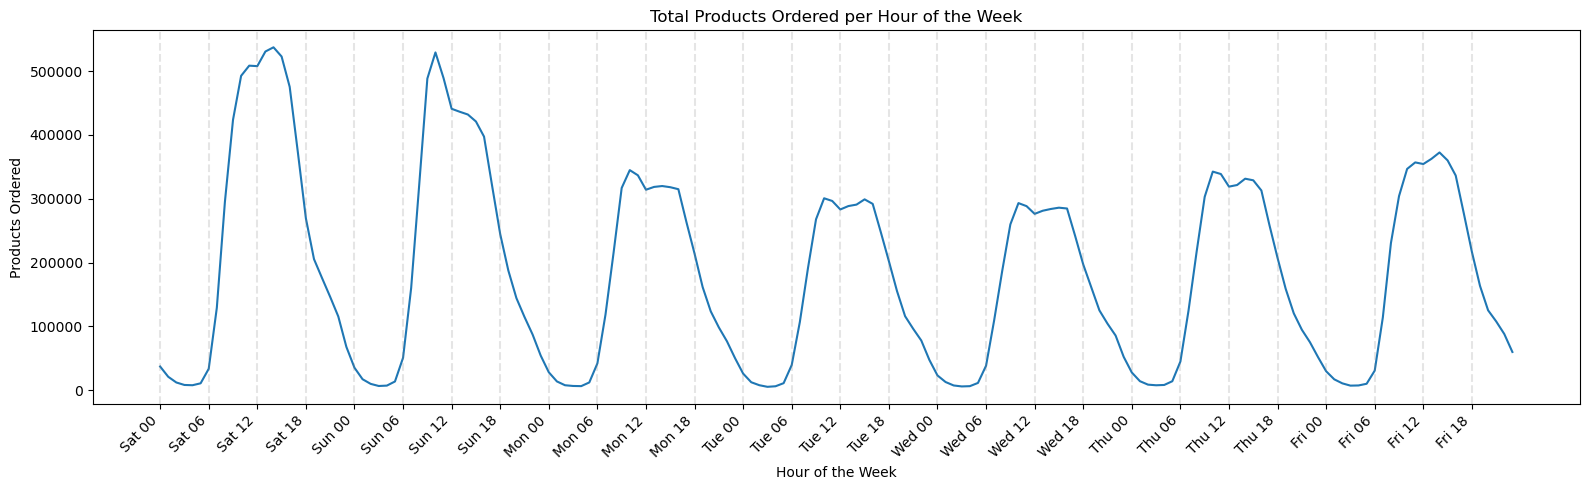

In [10]:
line_day_hours = plt.figure(figsize=(16, 5))
sns.lineplot(data=hourly_counts, 
             x='day_hour', 
             y='num_rows')

# Loop through 6-hour marks adding vertical lines
xticks = list(range(0, 168, 6))
for tick in xticks:
    plt.axvline(x=tick, color='gray', 
                linestyle='--', 
                alpha=0.2)

# Title and labels
plt.title('Total Products Ordered per Hour of the Week')
plt.xlabel('Hour of the Week')
plt.ylabel('Products Ordered')

# Add x-axis labels (day and hour)
day_labels = {0: "Sat", 1: "Sun", 2: "Mon", 3: "Tue", 4: "Wed", 5: "Thu", 6: "Fri"}
xtick_labels = [f"{day_labels[i // 24]} {str(i % 24).zfill(2)}" for i in xticks]
plt.xticks(xticks, xtick_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [11]:
# Saving
line_day_hours.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'line_daily_hours.png'))

# 4. Visualising products ordered by price

In [12]:
# loading limited df 
price_df = df_min5[['price_range_loc', 'prices']].copy()

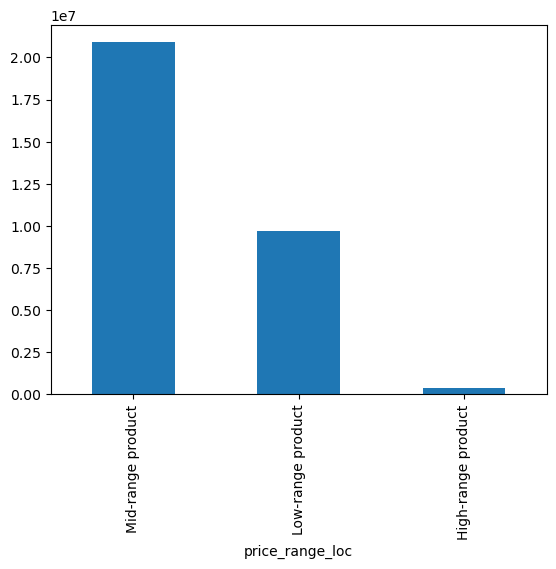

In [13]:
# Simple Bar plot
bar_price_range = price_df['price_range_loc'].value_counts().plot.bar()

In [14]:
# Dictionary for labels
price_range_labels = {
    'Low-range product': 'Low-Range Products (<= $5)',
    'Mid-range product': 'Mid-Range Products ($6-15)',
    'High-range product': 'High-Range Products ($15+)'
}


C:\Users\seank\AppData\Local\Temp\ipykernel_8912\2889911855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=price_df,


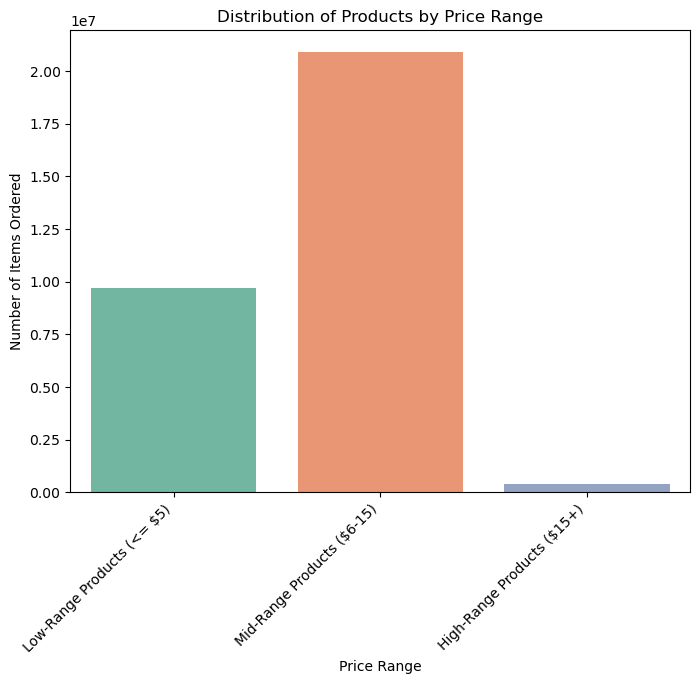

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=price_df,
              x='price_range_loc', 
              palette='Set2')
plt.title('Distribution of Products by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Items Ordered')

plt.xticks(ticks=range(3), 
           labels=[price_range_labels[label] for label in price_df['price_range_loc'].unique()])
plt.xticks(rotation=45, ha='right')

plt.show()

C:\Users\seank\AppData\Local\Temp\ipykernel_8912\2519326399.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=price_df,


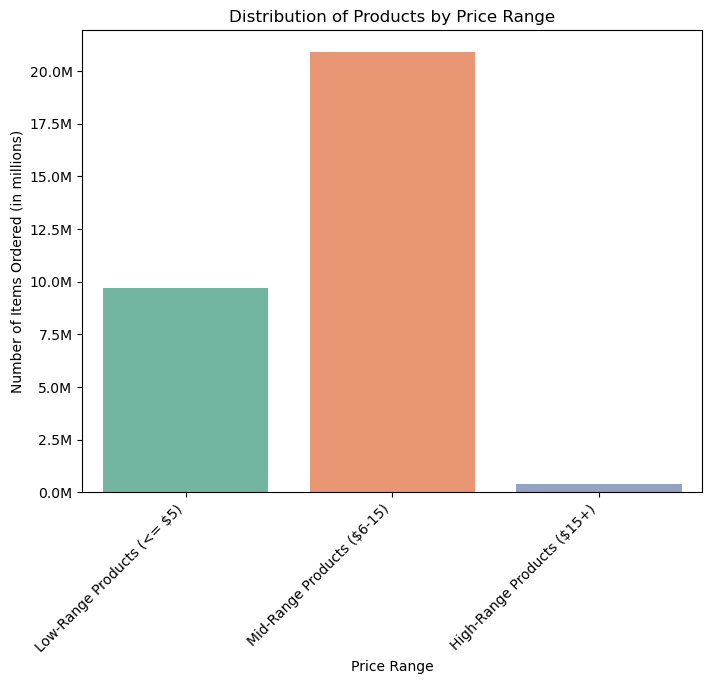

In [16]:
from matplotlib import ticker  # Import ticker for formatting the y-axis
from matplotlib.ticker import FuncFormatter

# Countplot of price_range_loc
bar_prices = plt.figure(figsize=(8, 6))
sns.countplot(data=price_df,
              x='price_range_loc', 
              palette='Set2')
plt.title('Distribution of Products by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Items Ordered (in millions)')

plt.xticks(ticks=range(3), 
           labels=[price_range_labels[label] for label in price_df['price_range_loc'].unique()])
plt.xticks(rotation=45, ha='right')

# Format the y-axis ticks to avoid scientific notation and scale to millions
ax = plt.gca()  # Get current axes
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

plt.show()

In [17]:
# Saving
bar_prices.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_price_range.png'),
                   bbox_inches='tight')

# 5. Checking proportions of users by loyalty status

In [18]:
# unique user df 
df_unique_min5 = df_min5.drop_duplicates(subset='user_id')

In [19]:
# Dictionary for loyalty flag
loyalty_labels = {'Loyal customer':'Loyal (>40)', 
                   'New customer':'New (<=10)', 
                   'Regular customer':'Regular (>10 <=40)'
                   }

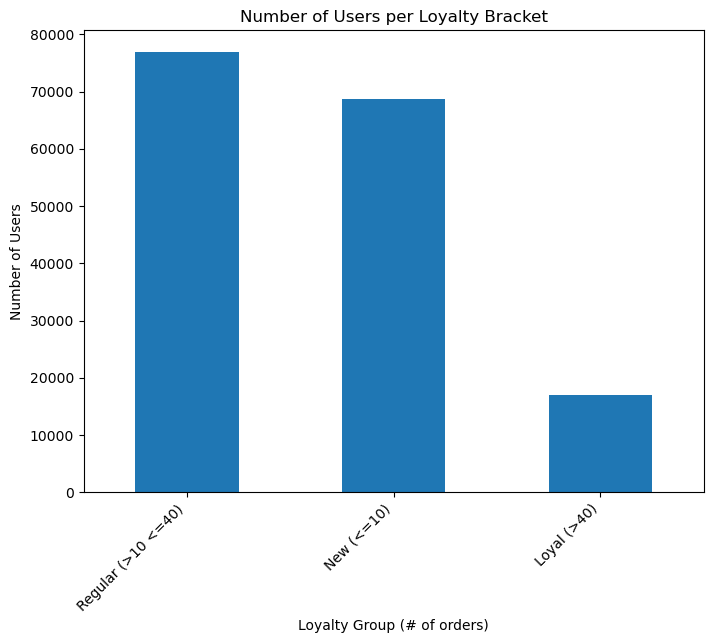

In [20]:
# Bar plot of number of users per loyalty group

bar_loyalty = plt.figure(figsize=(8, 6))
df_unique_min5['loyalty_flag'].value_counts().plot.bar()

# Get the order of groups used in the plot
plot_order = df_unique_min5['loyalty_flag'].value_counts().index

plt.title('Number of Users per Loyalty Bracket')
plt.xlabel('Loyalty Group (# of orders)')
plt.ylabel('Number of Users')

plt.xticks(ticks=range(len(plot_order)),
           labels=[loyalty_labels[label] for label in plot_order],
           rotation=45, ha='right')

plt.show()

In [21]:
bar_loyalty.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_loyalty_users.png'),
                   bbox_inches='tight')

# 6. Spending habits based on loyalty groups

In [6]:
# Getting df with price per order
order_totals = df_min5.groupby('order_id')['prices'].sum().reset_index(name='total_order_price')

In [7]:
# Add loyalty flag back
    # extracting loyalty flag value for each user/order
order_loyalty = df_min5.groupby('order_id')['loyalty_flag'].first().reset_index()

In [8]:
# Merging
df_loyalty_orderspend = pd.merge(order_totals, 
                                 order_loyalty, 
                                 on='order_id')

In [25]:
# DF with averages calculated
avg_prices = df_loyalty_orderspend.groupby('loyalty_flag', as_index=True)['total_order_price'].mean()

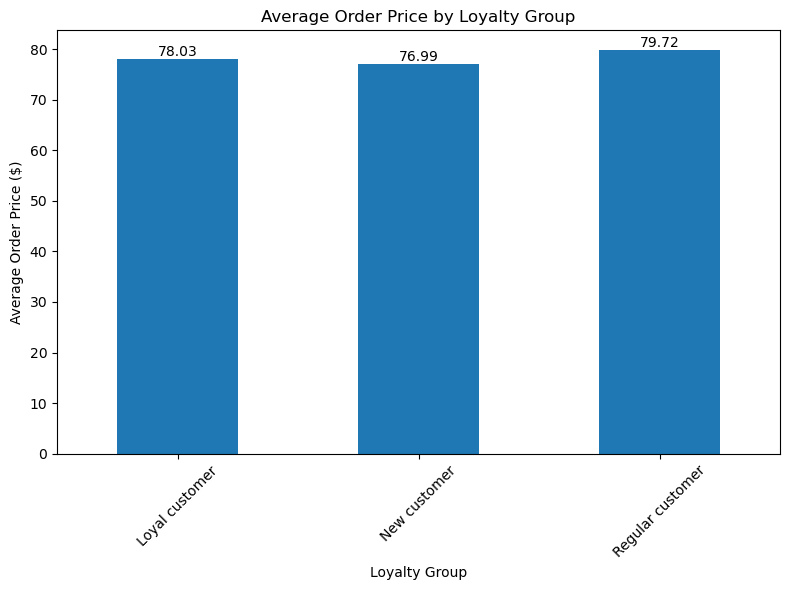

In [26]:
# Bar chart
bar_loyal_spend = plt.figure(figsize=(8, 6))
ax = avg_prices.plot.bar()

# title and labels
plt.title('Average Order Price by Loyalty Group')
plt.xlabel('Loyalty Group')
plt.ylabel('Average Order Price ($)')
plt.xticks(rotation=45)

# Add values above bars 
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    ax.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}',  # Add value label
            ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

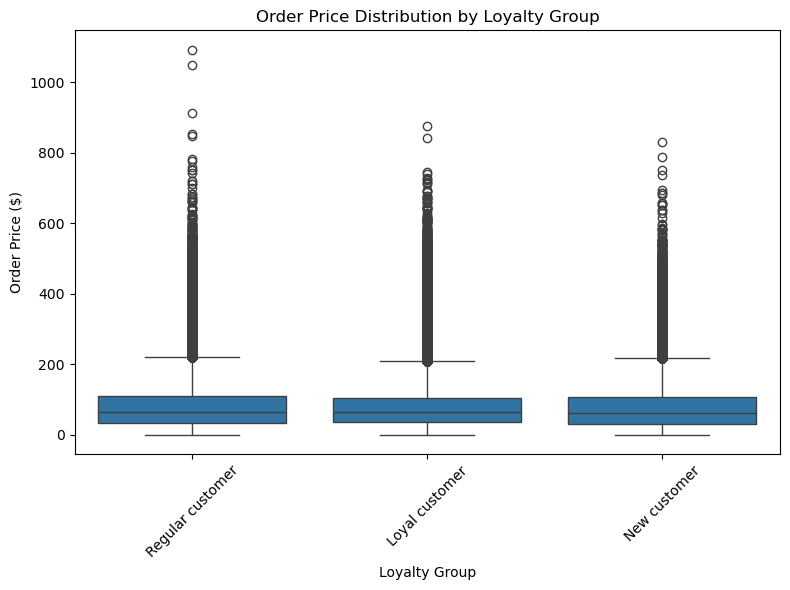

In [27]:
# boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='loyalty_flag', y='total_order_price', data=df_loyalty_orderspend)

# Add title and labels
plt.title('Order Price Distribution by Loyalty Group')
plt.xlabel('Loyalty Group')
plt.ylabel('Order Price ($)')
plt.xticks(rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Quite similar distributions. Doing an analysis of variance

In [9]:
df_loyalty_orderspend.head()

,order_id,total_order_price,loyalty_flag
0,10,132.800003,Regular customer
1,1000,33.599998,Loyal customer
2,10000,125.699997,Regular customer
3,1000000,35.099998,Regular customer
4,1000001,82.199997,New customer


In [ ]:
# Conducting ANOVA test to see if total order price differs between loyalty groups
import scipy.stats as stats

stats.f_oneway(df_loyalty_orderspend['total_order_price'][df_loyalty_orderspend['loyalty_flag'] == 'Regular customer'],
               df_loyalty_orderspend['total_order_price'][df_loyalty_orderspend['loyalty_flag'] == 'Loyal customer'],
               df_loyalty_orderspend['total_order_price'][df_loyalty_orderspend['loyalty_flag'] == 'New customer'])

F_onewayResult(statistic=481.6964718623217, pvalue=6.835303689153787e-210)

# 7. Regional Stacked Bar Charts of Customer Habits

Prepping Data for plotting

In [ ]:
# Getting unique user data to Long Format
df_unique_long = df_unique_min5.melt(
    id_vars='region',
    value_vars=['loyalty_flag', 'spending_flag', 'frequency_flag'],
    var_name='indicator',
    value_name='category'
)

In [ ]:
# Count all category combinations
flags_grouped = df_unique_long.groupby(['indicator', 'region', 'category']).size().reset_index(name='count')

# Get total counts per indicator/region to calculate %
totals = flags_grouped.groupby(['indicator', 'region'])['count'].transform('sum')
flags_grouped['percent'] = flags_grouped['count'] / totals

In [ ]:
# Pivot to wide for stacked bars
plot_data = flags_grouped.pivot_table(index=['indicator', 'region'], columns='category', values='percent', fill_value=0)

# Create multi-index for grouped x-axis
plot_data = plot_data.reset_index()

# Create a categorical x-axis combining indicator and region
plot_data['x'] = plot_data['indicator'] + ' - ' + plot_data['region']

# Set index to x-axis for stacked bar plotting
plot_data.set_index('x', inplace=True)

In [36]:
# Sort category columns for consistent legend order
sorted_categories = sorted(plot_data.columns.drop(['indicator', 'region', 'x'], errors='ignore'))


In [37]:
# Reorder columns
plot_data = plot_data[sorted_categories + ['indicator', 'region']] 

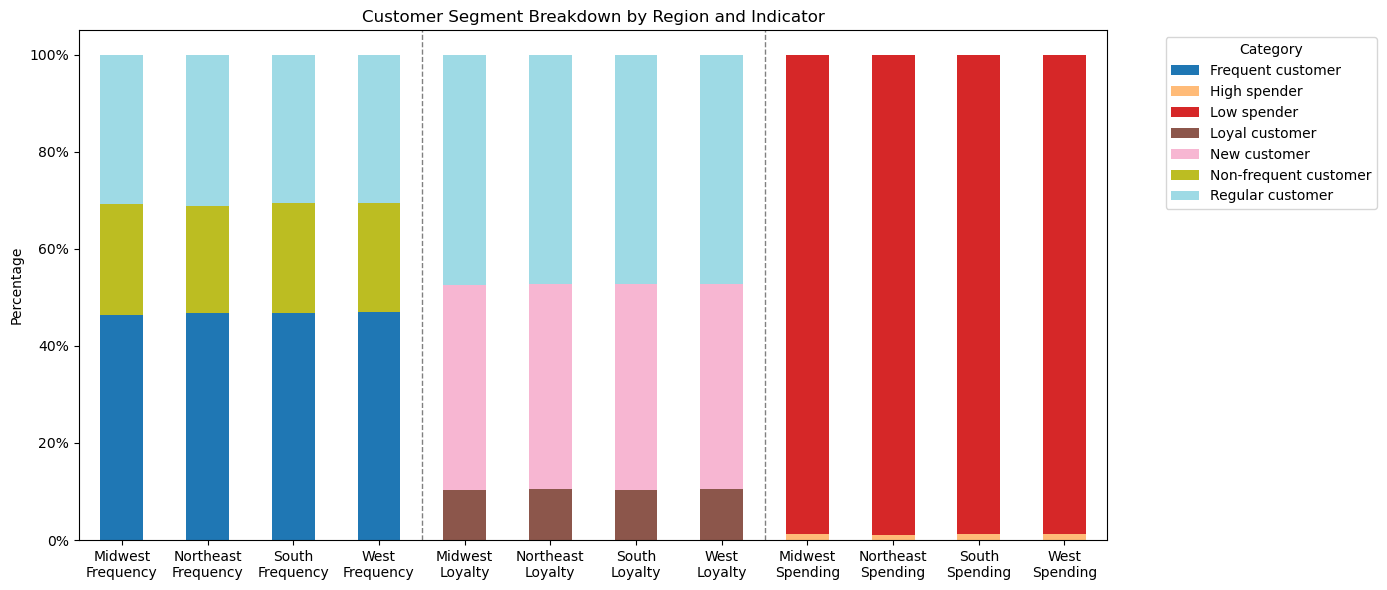

In [42]:
# Create the plot and capture Axes
stacked_bars_ax = plot_data[sorted_categories].plot(
    kind='bar',
    stacked=True,
    figsize=(14, 6),
    colormap='tab20'
)

# Format y-axis to show %
stacked_bars_ax.yaxis.set_major_formatter(PercentFormatter(1.0))
stacked_bars_ax.set_ylabel('Percentage')
stacked_bars_ax.set_title('Customer Segment Breakdown by Region and Indicator')

# Build new x-axis labels: region on top, indicator underneath
xtick_labels = [
    f"{row['region']}\n{row['indicator'].replace('_flag', '').title()}"
    for _, row in plot_data.reset_index().iterrows()
]
stacked_bars_ax.set_xticks(range(len(xtick_labels)))
stacked_bars_ax.set_xticklabels(xtick_labels, rotation=0)

# Add vertical lines between indicator groups
indicator_labels = plot_data.reset_index()['indicator'].tolist()
last_seen = None
for i, label in enumerate(indicator_labels):
    if last_seen is None:
        last_seen = label
    elif label != last_seen:
        stacked_bars_ax.axvline(i - 0.5, color='gray', linestyle='--', linewidth=1)
        last_seen = label

# Adjust legend
stacked_bars_ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove x-axis label
stacked_bars_ax.set_xlabel("")

plt.tight_layout()
plt.show()



In [45]:
stacked_bars_ax.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'stacked_bars_flags.png'),
                   bbox_inches='tight')

# 8. Demographic Groups and Products

In [47]:
# Step 1: Grouping by 'demographic_profile' and 'department' to count the number of orders per department
department_counts_demog = ( df_min5.groupby(['demographic_profile', 'department'])['department']
                     .count()
                     .reset_index(name='order_count') )

In [48]:
# Capture top departments per group
top_departments_by_demog = ( department_counts_demog
                             .sort_values(by=['demographic_profile', 'order_count'],
                                          ascending=[True, False]) )

In [49]:
# Getting each demographics' product preference as % of total orders
    # First calculating total
top_departments_by_demog['demog_total'] = top_departments_by_demog.groupby('demographic_profile')['order_count'].transform('sum')

In [50]:
# Converting value counts to % of total
top_departments_by_demog['percent_of_demog'] = (top_departments_by_demog['order_count'] / top_departments_by_demog['demog_total']) * 100

In [51]:
# Pivotting data for a heatmap
demog_heatmap_data = top_departments_by_demog.pivot(index='department', columns='demographic_profile', values='percent_of_demog')

# Sort departments by their average % share for better visual
demog_heatmap_data = demog_heatmap_data.loc[demog_heatmap_data.mean(axis=1).sort_values(ascending=False).index]

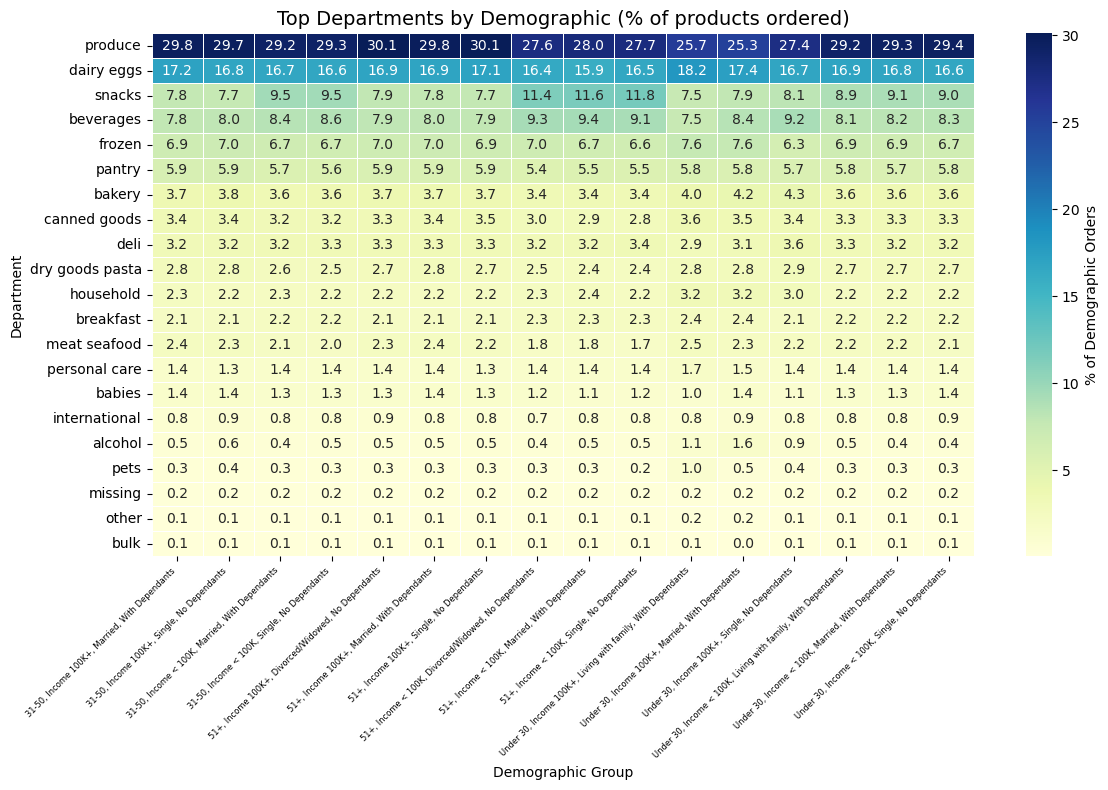

In [55]:
# Plotting on heatmap
plt_demog_heat = plt.figure(figsize=(12, 8))
sns.heatmap(demog_heatmap_data, 
            annot=True, 
            fmt=".1f", 
            cmap="YlGnBu", 
            linewidths=0.5, 
            cbar_kws={'label': '% of Demographic Orders'})

plt.title('Top Departments by Demographic (% of products ordered)', fontsize=14)
plt.xlabel('Demographic Group')
plt.ylabel('Department')
plt.xticks(rotation=45,
           fontsize=6,
           ha='right')
plt.tight_layout()
plt.show()

In [56]:
# saving
plt_demog_heat.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'heat_demog_departments.png'), 
            dpi=300, 
            bbox_inches='tight')

# 9 Select Departments Ordering Analysis

In [12]:
# Creating limited df
df_deps = df_min5[['order_id', 'user_id', 'demographic_profile', 'prices', 'department', 
                  'orders_day_of_week', 'order_hour_of_day']].copy()

In [13]:
# Axis for line plot
df_deps['day_hour'] = df_deps['order_hour_of_day'] + (df_deps['orders_day_of_week']*24)

In [14]:
# Count number of rows (products) per department per hour of the week
hourly_dep_counts = df_deps.groupby(['day_hour', 'department']).size().reset_index(name='num_rows')
hourly_dep_counts.head()

,day_hour,department,num_rows
0,0,alcohol,52
1,0,babies,394
2,0,bakery,1246
3,0,beverages,2853
4,0,breakfast,691


In [ ]:
# DF with just alcohol, meat seafood, beverages, snacks orders
selected_departments = ['alcohol', 'snacks', 'beverages', 'meat seafood']
df_selected_deps = hourly_dep_counts[hourly_dep_counts['department'].isin(selected_departments)]

In [28]:
# Labels for days of week
day_labels = {0: "Sat", 1: "Sun", 2: "Mon", 3: "Tue", 4: "Wed", 5: "Thu", 6: "Fri"}

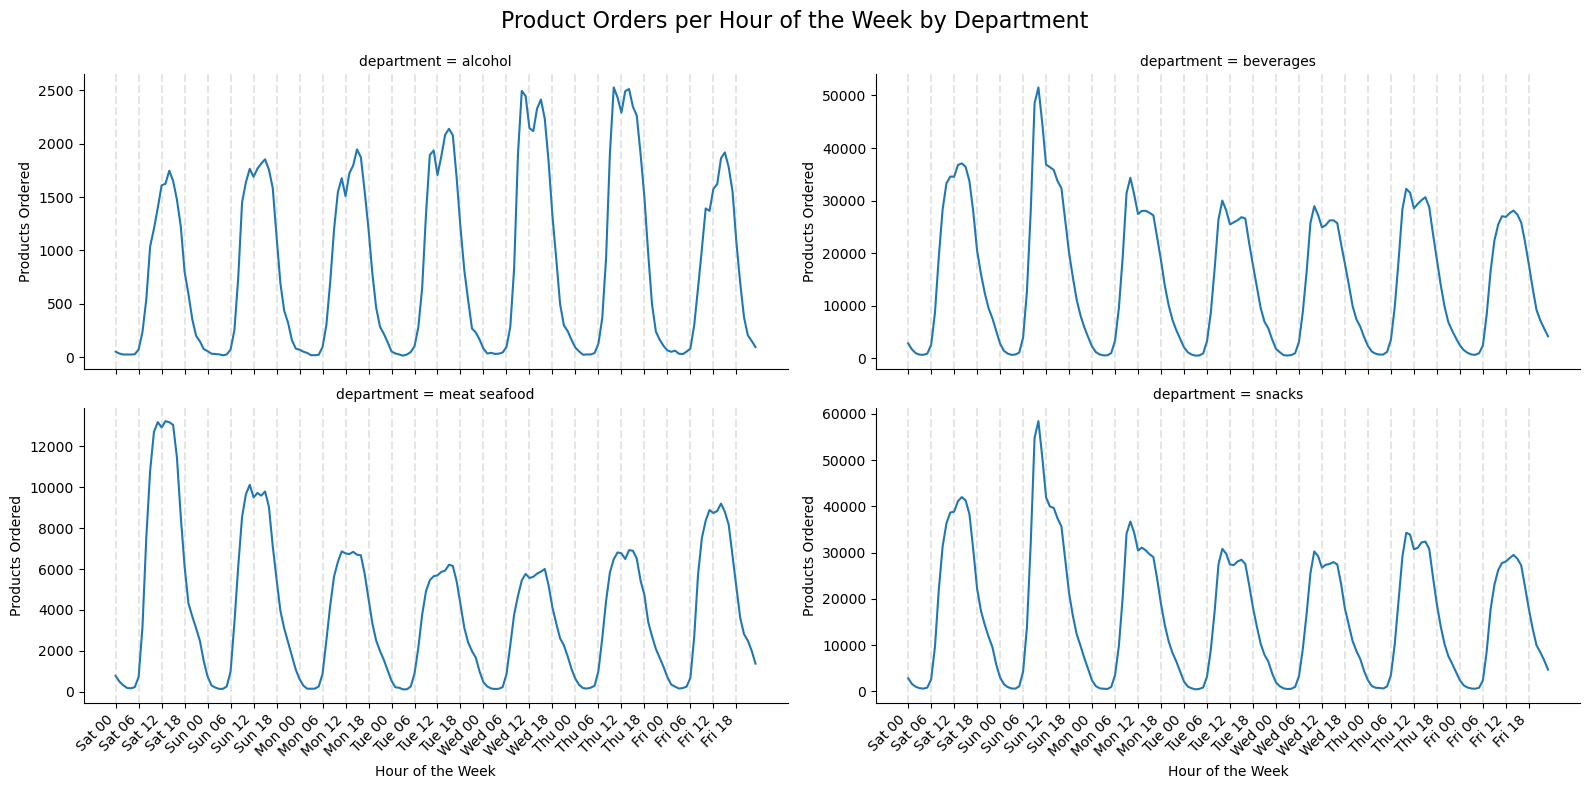

In [29]:
# faceted line plots
g = sns.FacetGrid(df_selected_deps, 
                  col="department", 
                  col_wrap=2, 
                  height=4, 
                  aspect=2, 
                  sharey=False)

g.map(sns.lineplot, 'day_hour', 'num_rows')

# Step 5: Add vertical lines to each plot for every 6-hour mark
xticks = list(range(0, 168, 6))
for ax in g.axes.flat:
    for tick in xticks:
        ax.axvline(x=tick, color='gray', linestyle='--', alpha=0.2)

# Step 6: Set titles and formatted x-axis labels
day_labels = {0: "Sat", 1: "Sun", 2: "Mon", 3: "Tue", 4: "Wed", 5: "Thu", 6: "Fri"}
xtick_labels = [f"{day_labels[i // 24]} {str(i % 24).zfill(2)}" for i in xticks]

for ax in g.axes.flat:
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels, rotation=45, ha='right')
    ax.set_xlabel('Hour of the Week')
    ax.set_ylabel('Products Ordered')

g.fig.suptitle('Product Orders per Hour of the Week by Department', fontsize=16)
g.tight_layout()
g.fig.subplots_adjust(top=0.9)  # Leave space for suptitle

plt.show()

In [31]:
# Saving
g.figure.savefig(os.path.join(path,'04_Analysis', 'Visualizations', 'facet_time_departments.png'), 
            dpi=300, 
            bbox_inches='tight')

Checking average price of department items

In [24]:
average_dep_price = df_deps.groupby('department')['prices'].mean()
print(average_dep_price)

department
alcohol             8.150699
babies              7.634399
bakery              7.857482
beverages           7.682556
breakfast           8.031647
bulk                8.346919
canned goods        7.546660
dairy eggs          8.334423
deli                7.783347
dry goods pasta     7.349370
frozen              7.733725
household           7.379951
international       7.678797
meat seafood       16.300034
missing             8.660655
other               6.961995
pantry              8.014482
personal care       7.998744
pets                7.887488
produce             7.980348
snacks              4.275555
Name: prices, dtype: float32


Text(0.5, 1.0, 'Average Price of Products Sold by Department')

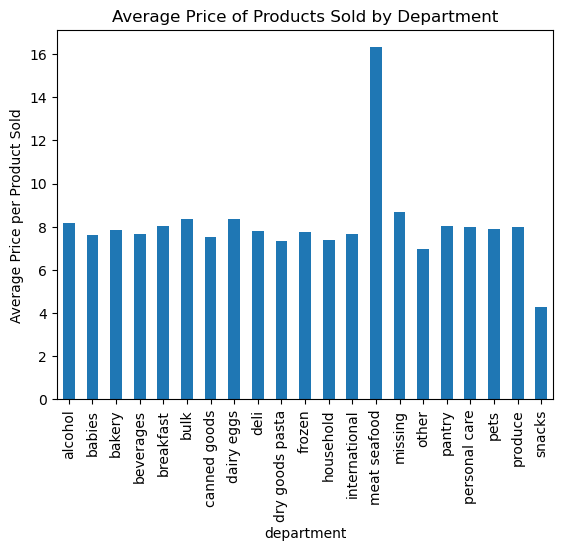

In [35]:
avg_price_bar = average_dep_price.plot.bar()
avg_price_bar.set_ylabel('Average Price per Product Sold')
avg_price_bar.set_title('Average Price of Products Sold by Department')